## Classification using Tensorflow

We are going to try the digits data set - actually two different digits datasets and use Neural Networks to classify them.

Convolutional Neural Networks are the best thing around for images now, but they're for next week.

Digits have 10 possible categories.

I'm not spending much time trying to decide on the number of layers and units - I could use validation sets to try picking better ones but I just want to demonstrate to you some of the features of the library

In [7]:
import os  # Provides OS-related functionalities like file and directory operations
import sys  # Access system-specific parameters and functions

# Handle platform-specific behaviour for Windows
if sys.platform == "win32":
    import builtins  # Built-in functions and objects
    builtins.resource = None  # Set 'resource' to None to avoid potential compatibility issues

import tensorflow as tf  # Import TensorFlow for machine learning and deep learning tasks
# Install TensorFlow if not already installed using: pip install tensorflow

import numpy as np  # For numerical computations and array manipulation
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets


In [8]:
import tensorflow_datasets as tfds      # pip install tensorflow_datasets if necessary

ImportError: cannot import name 'core' from partially initialized module 'tensorflow_datasets' (most likely due to a circular import) (C:\Users\norbe\AppData\Roaming\Python\Python39\site-packages\tensorflow_datasets\__init__.py)

Let's use sklearn's dataset first

In [9]:
# Import the datasets module from scikit-learn
from sklearn import datasets
digits = datasets.load_digits() # Load the Digits dataset
# Access the image data from the dataset
data = digits.images  # Each image is an 8x8 array of pixel intensities
# Print all the target values (labels) associated with the images
print(digits.target)  # The targets represent the digit (0-9) depicted in each image

[0 1 2 ... 8 9 8]


So the targets are the numbers 
0,1,2,3,4,5,6,7,8,9

10 possible classes

In [10]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

In [11]:
X_train # check train data

array([[[ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  3., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  4., 16., ..., 15.,  2.,  0.],
        [ 0.,  1., 14., ..., 13., 11.,  0.],
        [ 0.,  0.,  3., ..., 13.,  4.,  0.]],

       [[ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0., 15., ..., 12.,  0.,  0.],
        [ 0.,  3., 10., ..., 12.,  5.,  0.],
        ...,
        [ 0.,  5.,  8., ..., 10.,  6.,  0.],
        [ 0.,  4., 13., ..., 13.,  0.,  0.],
        [ 0.,  0.,  6., ...,  3.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  3.,  0.,  0.],
        [ 0.,  0.,  8., ..., 12.,  0.,  0.],
        [ 0.,  3., 16., ..., 14.,  1.,  0.],
        ...,
        [ 0.,  2., 13., ..., 16.,  4.,  0.],
        [ 0.,  0., 10., ..., 14.,  1.,  0.],
        [ 0.,  0.,  2., ...,  6.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  9., ..., 13.,  1.,  0.],
        [ 0.,  0., 12., ..., 16.,  7.,  0.],
        [ 0.,  0.,  0., ..., 16.,  4.,  0.

In [12]:
X_train.shape

(1437, 8, 8)

8 x 8 images, not very detailed but let's do it anyway

In [13]:
X_train.min()

0.0

In [14]:
X_train.max()

16.0

Greyscale, with min 0 and max 16. It doesn't even have 255 possibilities! It's a 4-bit image. 

But anyway, we can still do machine learning

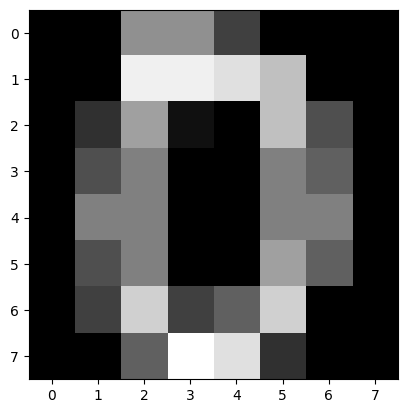

In [15]:
plt.imshow(X_train[1],cmap='gray')

In machine learning, especially for image recognition tasks, normalizing input data is crucial for effective model training. For digit recognition, where images are represented as 8×8 grids with pixel values ranging from 0 to 16, scaling these values to a 0 to 1 range enhances model performance.

We should scale the numbers data between 0 and 1 rather than 0 and 16. To do this let's just divide by 16. But let's build it into the model by setting up a rescaling layer

1. **Rescaling**: This layer normalises pixel values by dividing them by 16, converting the range \(0-16\) to \(0.0-1.0\).
2. **Input Shape**: Defines the input as \(8 \times 8\), matching the dimensions of the digit images.
3. **Purpose**: Ensures the data is normalised for stable and efficient training.


In [16]:
# create rescaling layer
div16 = tf.keras.layers.Rescaling(scale=1./16, input_shape=(8, 8))

c:\Users\norbe\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sequential Model as usual

In [17]:
model = tf.keras.models.Sequential()
model.add(div16) # add in the rescaling

For the Dense layers, it has to be a "flattened" image. i.e. instead of X_train[0] being 8x8 we want it to be 64.

This means that for Dense (fully connected) layers in a neural network, the input data must be in a 1-dimensional (flat) format rather than its original multi-dimensional shape.

Original Shape (8×8): If the input image is an 8×8 grid (a 2D array with 8 rows and 8 columns), the data structure has two dimensions.
Flattened Shape (64): The grid is "flattened" into a single vector with 64 values (8×8 = 64). This turns the 2D array into a 1D array.

In [18]:
model.add(tf.keras.layers.Flatten())
# reshapes multi-dimensional inputs (e.g., 8×8) into a 1D array (e.g., 64) to prepare data for Dense layers.

Now let's add the hidden layers. I'm going for 2 hidden layers each with 40 units. Why? No real reason why I picked that structure, I just want to see what happens with it

This means the model will have two hidden layers, each containing 40 neurons (units). The choice of 40 units and 2 layers is arbitrary and experimental—used to observe how this structure affects the model's performance. This is common in machine learning when fine-tuning model architecture.

In [19]:
model.add(tf.keras.layers.Dense(40,activation='relu'))
model.add(tf.keras.layers.Dense(40,activation='relu'))
# This adds two hidden Dense layers to the model, each with:
# 40 units: The number of neurons in each layer.
# activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, 
# which helps introduce non-linearity by outputting max(0,𝑥)max(0,x).
# These layers learn patterns from the input data and pass the learned features to subsequent layers.

We now need an output layer. Since there are 10 possible categories we need 10 units on the output layer

The output layer needs 10 units because there are 10 categories (e.g., digits 0-9). Each unit represents the probability of the input belonging to a specific category.

In [20]:
model.add(tf.keras.layers.Dense(10)) # output layer

Let's view our model

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 8, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,650 (18.16 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

| Layer (type)         | Output Shape    | Param #  | Explanation                                                                 |
|-----------------------|-----------------|----------|-----------------------------------------------------------------------------|
| Rescaling (Rescaling) | (None, 8, 8)   | 0        | Normalizes input pixel values to the range 0.0–1.0. No parameters to learn. |
| Flatten (Flatten)     | (None, 64)     | 0        | Converts 2D input (8×8) to a 1D vector of size 64 for Dense layers.         |
| Dense (Dense)         | (None, 40)     | 2,600    | Fully connected layer with 40 neurons. Learns 2,560 weights and 40 biases.  |
| Dense_1 (Dense)       | (None, 40)     | 1,640    | Fully connected layer with 40 neurons. Learns 1,600 weights and 40 biases.  |
| Dense_2 (Dense)       | (None, 10)     | 410      | Output layer with 10 neurons for classification. Learns 400 weights and 10 biases. |

`**Total Parameters:** 4,650` (The total number of parameters (weights and biases) in the model that need to be optimized during training. It’s the sum of all parameters in every layer of the model.)

`**Trainable Parameters:** 4,650` (These are parameters that the model learns and updates during training through backpropagation. All the parameters in this model are trainable because there are no frozen layers.) 
`**Non-trainable Parameters:** 0` (These are parameters that the model does not update during training.
They are typically used in pre-trained models where some layers are frozen, but in this case, there are no such layers.)

The model processes normalized 8×8 images, flattens them into vectors, passes them through two hidden layers with 40 neurons each, and finally outputs probabilities for 10 categories (e.g., digits 0–9). The parameters are what the model learns to improve its predictions during training.


It needs to learn 4,650 parameters

Now compile it. We need to pick the optimiser (just use Adam), the learning rate, the loss function and the metrics that we'll measure (we can put recall and precision in here too and get those values at each epoch)

## Why SparseCategoricalCrossentropy?

categorical_cross_entropy is for one-hot encoded data i.e. as vectors
<img src="onehot.png">

I want to just use numbers to label the things, SparseCategoricalCrossentropy allows me to just use numbers

For example in the above picture red could be 0, blue 1 and green 2

The following code configures the model for training by specifying:

Optimizer (Adam):

`tf.keras.optimizers.Adam(0.001)` initializes the Adam optimizer with a learning rate of 0.001.
Adam adjusts weights dynamically using gradient-based updates and works well for most tasks.
Loss Function (SparseCategoricalCrossentropy):

`tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` is used for multi-class classification when labels are integers (e.g., 0–9).
*from_logits=True* indicates the model’s output is raw (not softmax-activated), so the loss function applies softmax internally.
Metrics (accuracy):

Tracks the proportion of correct predictions during training and evaluation.
Purpose:
This sets the training rules for the model:

Adam optimizer updates weights.
Crossentropy loss measures prediction error.
Accuracy provides feedback on model performance.

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

I could try early stopping etc, but let's just go for 50 epochs

In [62]:
# train the model 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0183 - val_accuracy: 0.9549 - val_loss: 0.1612
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0168 - val_accuracy: 0.9549 - val_loss: 0.1660
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0196 - val_accuracy: 0.9618 - val_loss: 0.1622
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0139 - val_accuracy: 0.9549 - val_loss: 0.1663
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0241 - val_accuracy: 0.9514 - val_loss: 0.1681
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0157 - val_accuracy: 0.9583 - val_loss: 0.1500
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0132 - val_accuracy: 0.9618 - val_loss: 0.1549
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0148 - val_accuracy: 0.9583 - val_loss:

Looking at the numbers, we may be overfitting things as the training loss improved increased but the validation accuracy actually just fluctuated

Maybe I should've done early stopping but let's keep going by plotting. I'm copying and pasting this from the regression workbook

Also, I didn't seed any random number generators so you may get a different answer when you run this yourself

In [24]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    try:
        plt.plot(history.history['val_loss'], label='val_loss')
    except:
        None
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

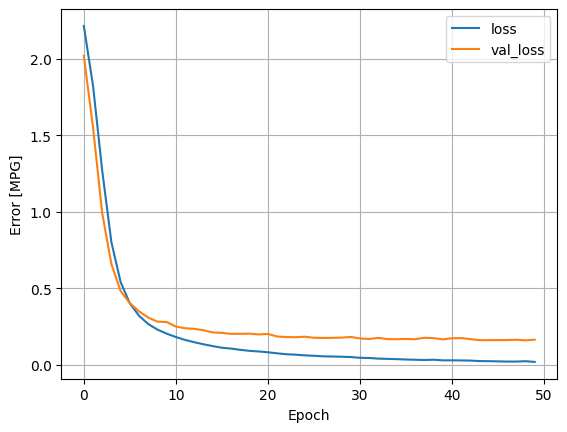

In [25]:
plot_loss(history)

In [ ]:
model.evaluate(X_train,y_train) # evaulate training

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0227  


[0.048100799322128296, 0.9902575016021729]

In [ ]:
model.evaluate(X_test,y_test) # evaluate test

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.0947 


[0.12831565737724304, 0.9555555582046509]

View output shape

In [28]:
X_test.shape

(360, 8, 8)

Record output predictions on the test set

In [29]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Print the predictions of the first image

In [30]:
y_pred[0]

array([-0.61908793, -2.4464316 , -8.76898   , -8.438976  ,  1.1610309 ,
       -4.177144  ,  9.646055  , -4.8274    ,  2.4290104 , -4.7912073 ],
      dtype=float32)

Above is the raw output (logits) of the model's prediction for the first sample in the dataset.
<br>In this example, 9.646055 (index 6) is the highest, so the model predicts class 6.

View what the correct class of image [0] in the test set is

In [31]:
y_test[0]

6

The prediction is also a 6.

In [32]:
np.argmax(y_pred[0]) # find highest prediction and output position

6

Ok, y_pred seems like just a bunch of numbers. Basically we just want the biggest one of those and that's how we classify it.

In my running of it, the biggest number was in position 6 (zero-based index), so the model predicts the thing to be in category 6. Let's view the image to verify

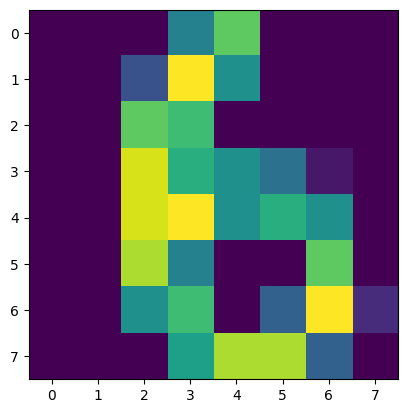

In [33]:
plt.imshow(X_test[0])

That looks like a 6

### Softmax Layer

In class I mentioned using a softmax layer to get probabilities instead at the end. This will look much nicer. I could have included the Softmax layer, made the activation='softmax' in the last layer. However, from Tensorflow documentation:

Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

So this is why I did not do this. Instead I am going to "add" it on like so

In [34]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [35]:
probability_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 10)             │         4,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,650 (18.16 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

We don't need to do anymore training, as the model has already learnt all 4,650 parameters. This is a very very simple transfer learning thing but will work well for us now

In [36]:
y_predictions = probability_model.predict(X_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [37]:
y_predictions[0][6]

0.99901795

The model says with probability 0.99 that the image is a 6. (Technically it's not exactly a probability but I'm not getting into that since it is "almost" a probability)

This plotting (from Google's docs) will visualise the images

In [64]:
# generate plot functions for later use
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  #print(predicted_label)
  #print(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



In [39]:
class_names = np.arange(0,10)

In [40]:
X_test.shape

(360, 8, 8)

In [41]:
y_test.shape

(360,)

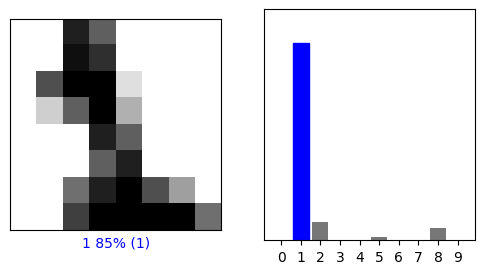

In [42]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_predictions[i],  y_test)
plt.show()


This plots the image on the left. Under that is the predicted class, then the "probability" that the model came up with, in brackets is the correct class.

The left plot shows a barchart of probabilities.

If everything is written in blue and the plot is in blue, then it was a correct prediction. If in red an incorrect prediction.

Let's now print 30 of them

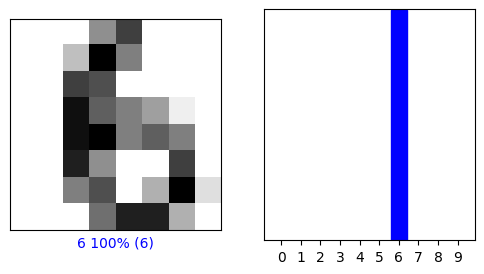

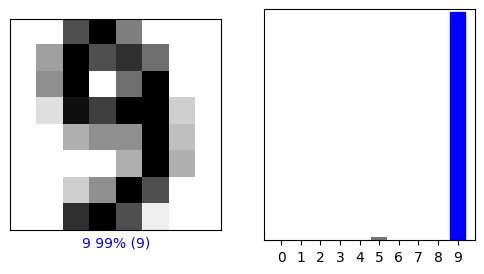

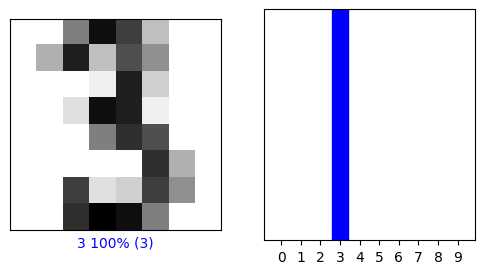

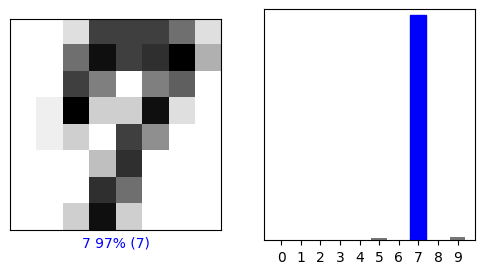

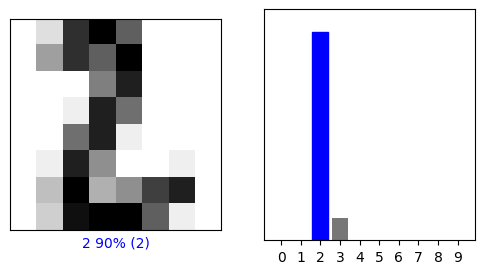

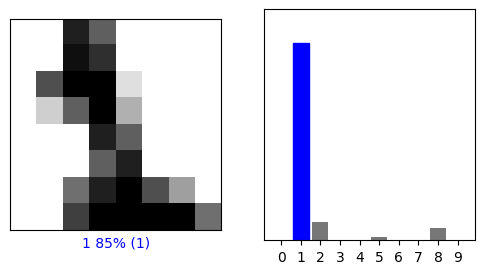

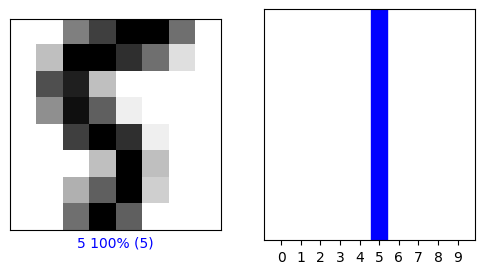

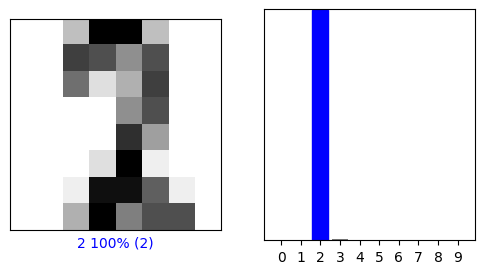

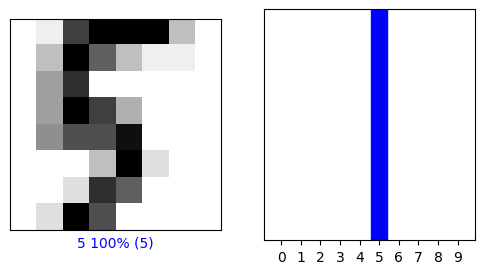

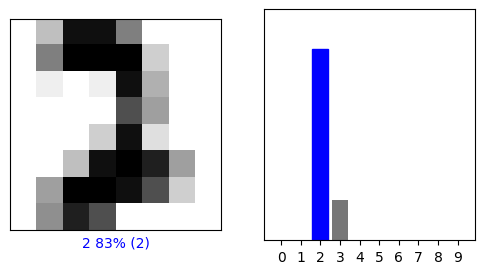

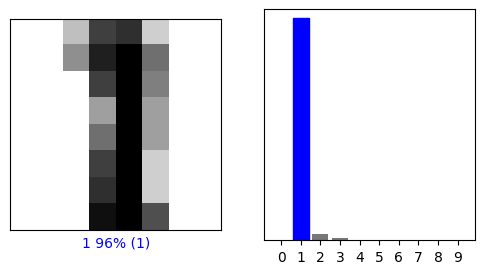

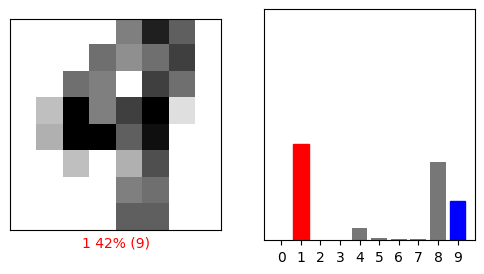

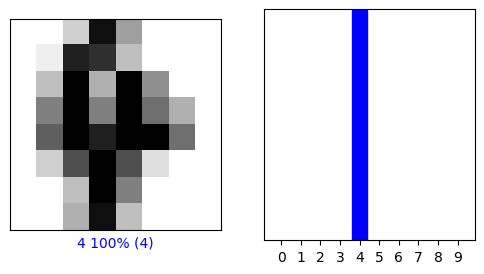

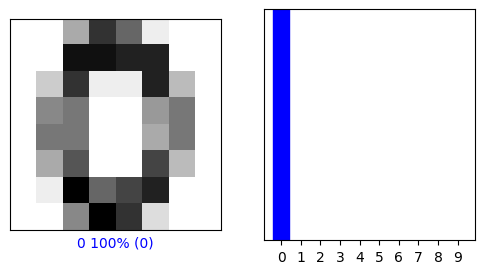

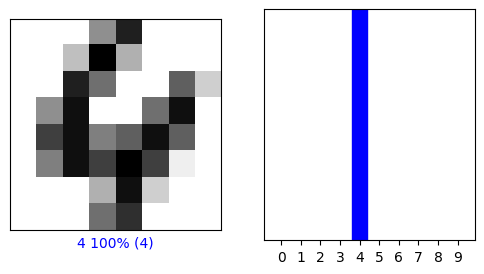

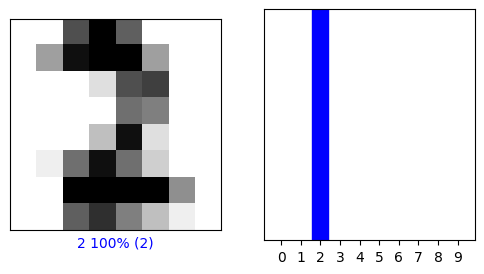

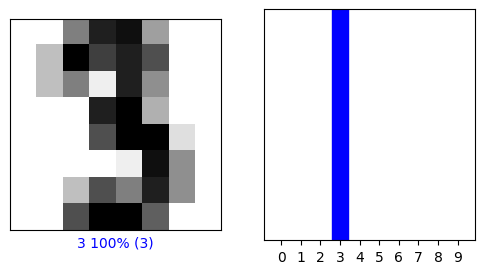

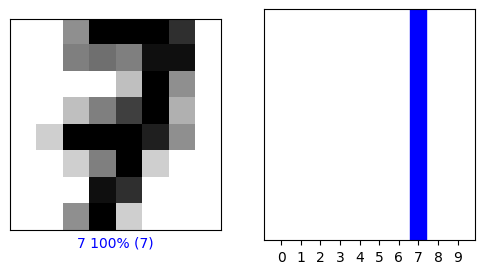

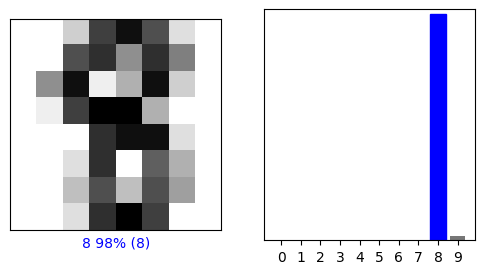

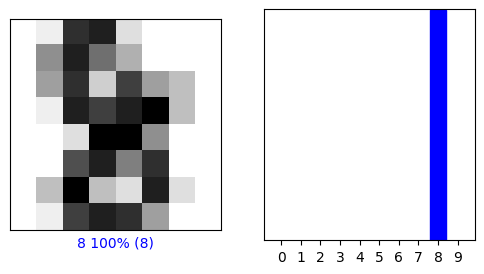

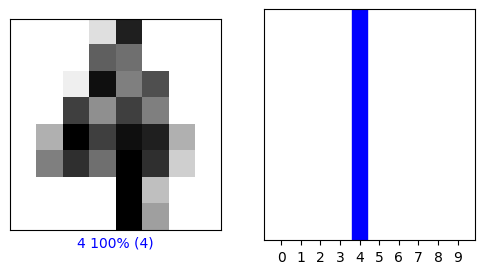

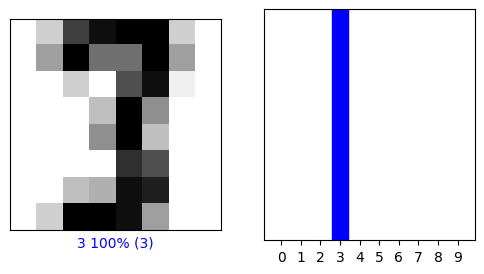

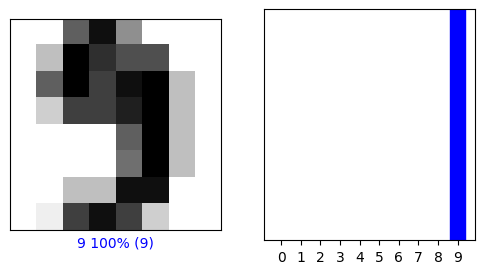

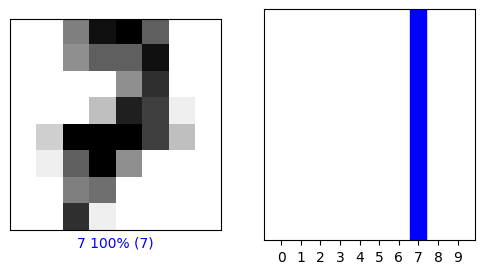

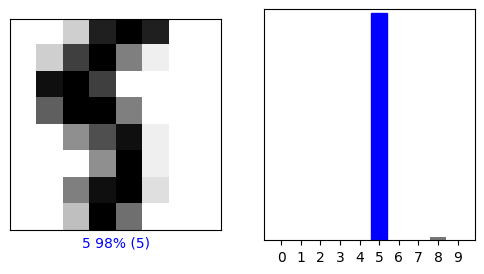

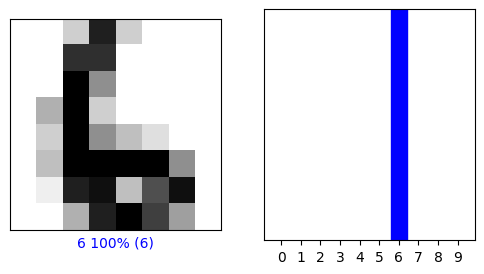

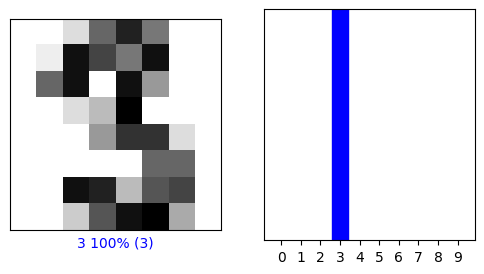

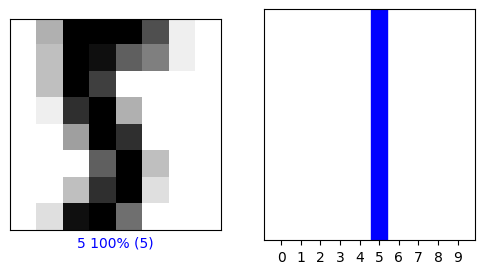

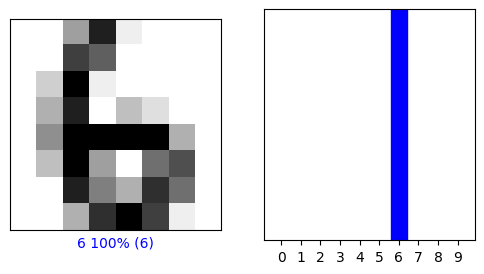

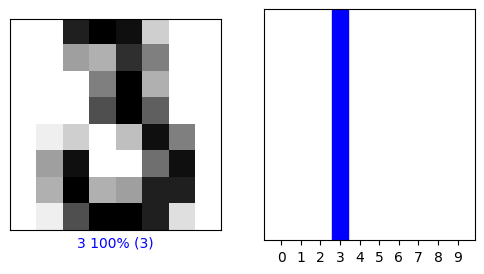

In [43]:
for i in range(0,30):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, y_predictions[i], y_test, X_test)
    plt.subplot(1,2,2)
    plot_value_array(i, y_predictions[i],  y_test)
    plt.show()

Now let's pick some ones I know are incorrect to ensure we see some (maybe 1 of the above were incorrect but all of these following will be)

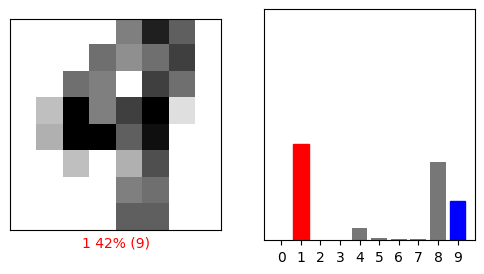

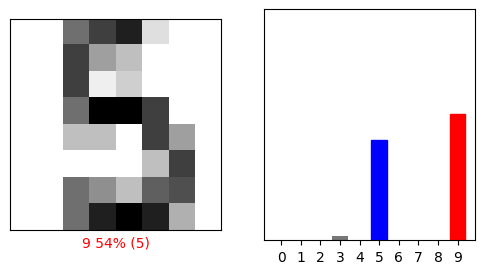

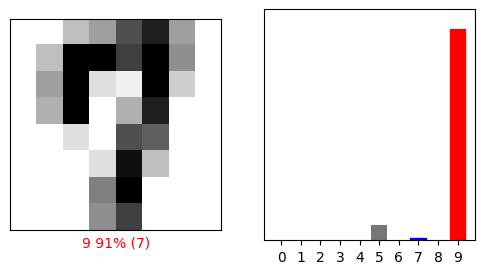

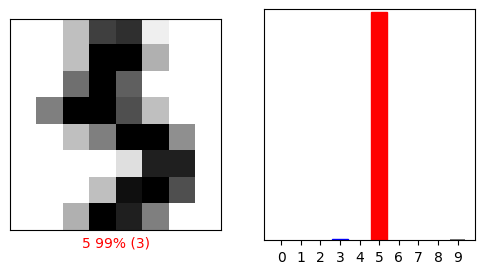

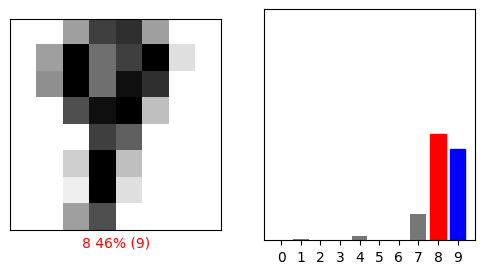

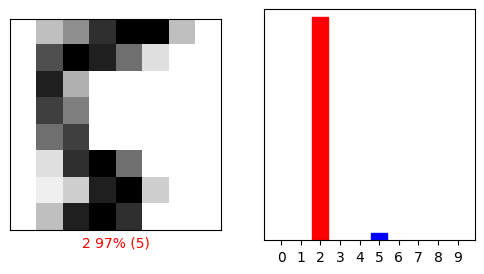

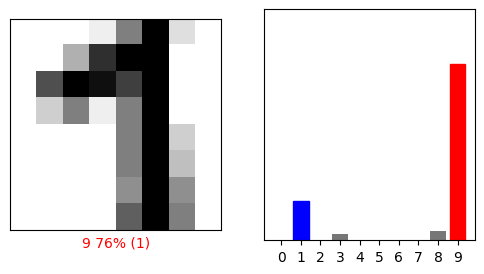

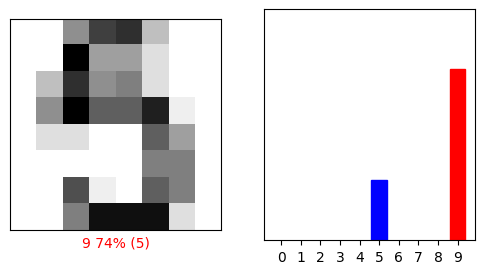

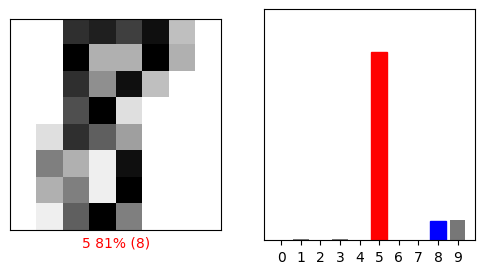

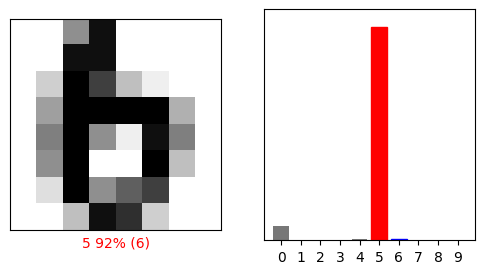

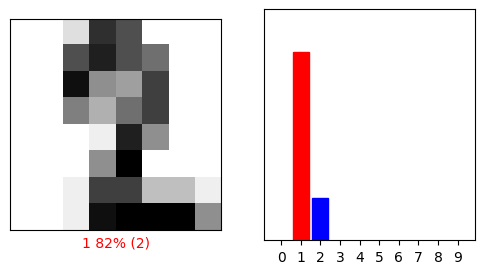

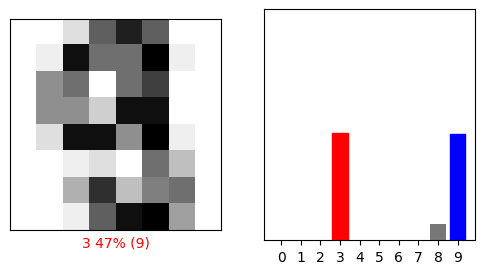

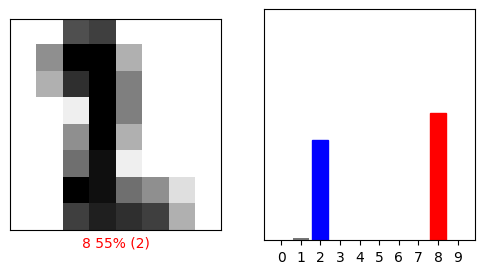

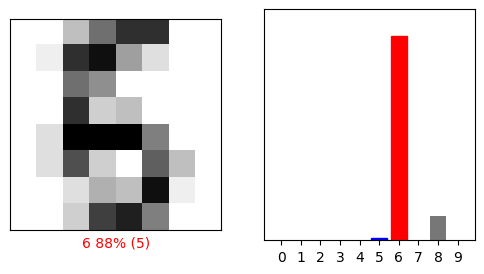

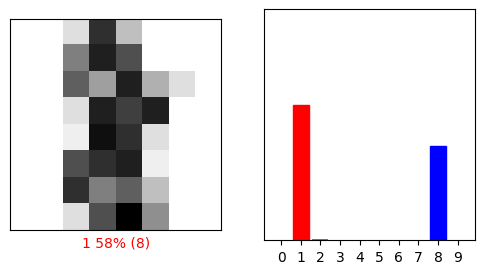

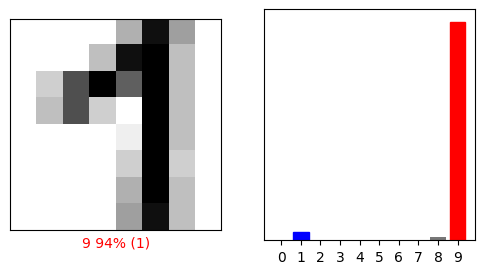

In [44]:
for i in range(0,y_test.shape[0]):
    predicted_label = np.argmax(y_predictions[i])
    true_label = y_test[i]
    if(predicted_label != true_label):      # Check if the prediction doesn't match true label
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, y_predictions[i], y_test, X_test)
        plt.subplot(1,2,2)
        plot_value_array(i, y_predictions[i],  y_test)
        plt.show()

### New Image DataSet.

Now, we'll repeat the above with a "better" dataset. Images with 28x28 resolution!

In [45]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [46]:
train_images.shape

(60000, 28, 28)

In [47]:
test_images.shape

(10000, 28, 28)

We're not going to use train_test_split as tf.keras has already divided the images for us

In [48]:
np.max(train_images)

255

8-bit images too, the values go from 0-255.

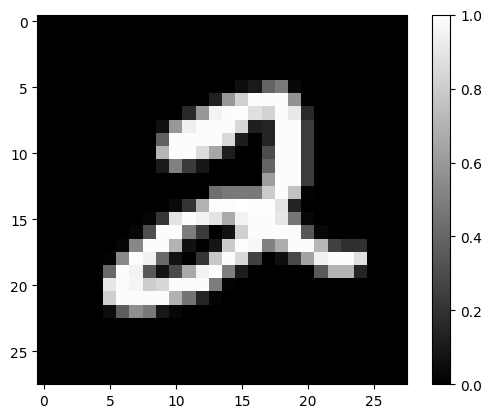

2


In [49]:
plt.figure()
plt.imshow(train_images[5]/255, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[5])

matplotlib works fine with the values from 0-255 or from 0-1 for grayscale. 

0-1 tends to work better. I am <b>not</b> using StandardScaler, I am just dividing by 255

We'll build this into the model. The below will give us a new layer we can use

In [50]:
div255 = tf.keras.layers.Rescaling(scale=1./255, input_shape=(28, 28))

Create Model2. Sequential.

I'll add the div255 layer, the flatten layer, 2 hidden layers with 128 units each and the end dense layer. Compile the model and print the summary

I will not add softmax yet for the reasons stated above. I'll add it afterwards like I did above.


In [51]:
model2 = tf.keras.models.Sequential()
model2.add(div255) # add in the rescaling
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(10))
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

It needs to learn 118282 parameters! This stuff is getting trickier

Now we'll compile it. 

In [52]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],    
)

Now we'll fit it, only 30 epochs, this one will take longer than previous one. Your laptop might get warm

In [53]:
history = model2.fit(train_images, train_labels, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8622 - loss: 0.4574 - val_accuracy: 0.9592 - val_loss: 0.1373
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1075 - val_accuracy: 0.9673 - val_loss: 0.1153
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9777 - loss: 0.0718 - val_accuracy: 0.9680 - val_loss: 0.1092
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9840 - loss: 0.0482 - val_accuracy: 0.9703 - val_loss: 0.1018
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9881 - loss: 0.0383 - val_accuracy: 0.9735 - val_loss: 0.0986
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0313 - val_accuracy: 0.9757 - val_loss: 0.0958
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9753 - val_loss: 0.0994
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0194 - 

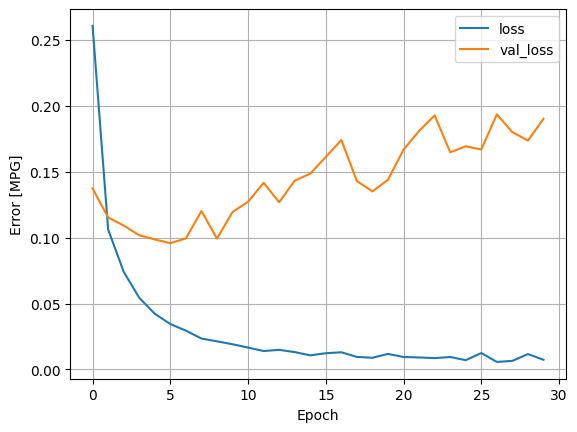

In [54]:
plot_loss(history)

Looks like the model is getting over-fitted

In [55]:
model2.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9722 - loss: 0.1868  


[0.16591951251029968, 0.9775000214576721]

Quite a high accuracy, over 97%!

Add the Softmax now

In [56]:
probability_model2 = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
probability_model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 10)             │       118,282 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
y_pred = probability_model2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


In [58]:
y_pred[0]

array([3.1279683e-17, 1.5381133e-13, 7.3152915e-16, 5.3937348e-11,
       2.8592641e-22, 7.9268644e-18, 1.7391130e-23, 1.0000000e+00,
       2.2621987e-16, 1.2233763e-11], dtype=float32)

In [59]:
np.argmax(y_pred[0])

7

In [60]:
test_labels[0]

7

Plot them as before

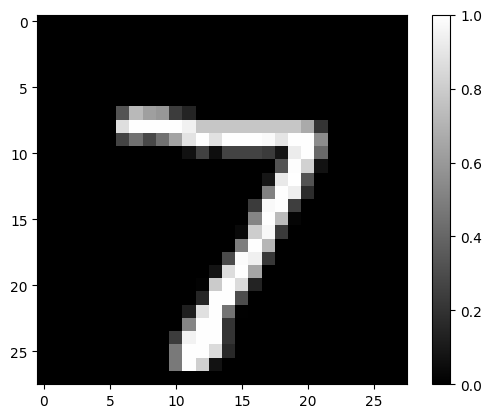

7


In [61]:
plt.figure()
plt.imshow(test_images[0]/255, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(test_labels[0])